# P2 Final: Investigating the Titanic Dataset
### By Daniel J. Lee

## 1. Introduction
The Titanic Data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The data was obtained from [Kaggle]('https://www.kaggle.com/c/titanic/data') website and the description of the data is also provided there.

*[Encyclopedia-Titanica](https://www.encyclopedia-titanica.org/titanic-deckplans/) offers a great detailed view on the floor plan of the Titanic.

For this project, we want to find the factors that would determine whether a given passenger would survive or not. We will examine the overall structure and its variables through wrangling and statistical analysis.

## 2. Overview

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic-data.csv');

In [3]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.dtypes

# Survived, (0 = No, 1 = Yes)
# Pclass, (1 = 1st, 2 = 2nd, 3 = 3rd)
# SibSp, (# of Sibling / Spouse aboard Titanic)
# Parch, (# of Parents / Children aboard Titanic)
# Embarked, (Embarked from port: C = Cherbourg, Q = Queenstown, S = Southampton)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Observations:</b>
<br>
<p>&#9642; Embarked, Sex, and Survived are catagorical variables while Pclass is an ordinal variable.<br>
&#9642; Age, SibSp, Parch, and Fare are numerical variables.<br>
&#9642; Ticket is both numeric and alphanumeric but not quite unique.<br>
&#9642; Cabin is just alphanumeric but contains deck information in first character that is ordinal.<br>
&#9642; 75% of the given passenger's age is less than 38.<br>
&#9642; Average fare price is \$32.20 which is $786.45 in [2017](http://www.in2013dollars.com/1912-dollars-in-2017?amount=32) by inflation.<br>
&#9642; The minimum age was 0.42 which represents under the age of 1.

## 3. Questions

The following questions arose after examining the data:
<br>
<p>&#9642; <b> Which variables have a strong correlation with one another?<br>
&#9642; Does social-economic status (SES) have impact on the survival rate?<br>
&#9642; Did port of embarkment affect survival rate?<br>
&#9642; Does having family relations tend to have a higher survival rate?<br>
&#9642; Are female passengers and infants are more likely to survive?</b>

## 4.  Wrangling

### 4a. Examining Structure

We initially explored the values that each column of the dataframe contained.

In [6]:
# Examining the count for unique values in each variable...
def count_values(variable):
    return df[variable].value_counts()

count_values('Pclass')/len(df.index)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<p>&#9642; It appears that <b>more than half</b> of the given passengers are 3rd class.</p>

In [7]:
len(df[(df['Parch']==0) &(df['SibSp']==0)])/ float(df['PassengerId'].count())

0.6026936026936027

<p>&#9642; It shows that 60% of the given passengers traveled alone with <b>no family relations</b>.</p>

In [8]:
print count_values('Age').head(), '\n'
print df['Age'].describe()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<p>&#9642; It seems that <b>24</b> is the most frequent age. Since the mean is greater than the median, we can expect a <b>right-skewed behavior distribution</b> with 714 counts. In order to get a better idea of stages of life each given passenger, I plan on creating a function to return a new variable 'Age_Bracket' in the later section.</p>

In [9]:
print 'Survived','\n',count_values('Survived'),'\n'
print 'Embarked','\n',count_values('Embarked'),'\n'
print 'Parch','\n',count_values('Parch'),'\n'
print 'SibSp','\n',count_values('SibSp')

Survived 
0    549
1    342
Name: Survived, dtype: int64 

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64 

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [12]:
count_values('Cabin').head()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
Name: Cabin, dtype: int64

<p>&#9642; Majority of the given passengers have either no parent/child or sibling/spouse relation.<br>
&#9642; It seems that variables 'Ticket', 'PassengerID' and 'Name' are relatively unique and not explored.<br>
&#9642; Most of the given passengers have information for came from Southampton.<br>
&#9642; The first character displayed the deck information which is ordinal (highest to lowest position). The character will be extracted later in this section.
</p>

In [13]:
count_values('Survived')/len(df.index)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<p>&#9642; We are given ~40% of the total passengers that boarded the Titanic. From the given passengers, only 38% of the passengers survived.</p>

### 4b. Updating Values

In [122]:
# C = Cherbourg, Q = Queenstown, S = Southampton)
def update_embarked(x):
    if x == 'S':
        return 'Southampton'
    elif x == 'Q':
        return 'Queenstown'
    elif x == 'C':
        return 'Cherbourg'
    else:
        return np.nan
    
df['Embarked'] = pd.Series(df.Embarked.apply(update_embarked), index=df.index)
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Age_Bracket
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,Cherbourg,1,Young Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Queenstown,1,Young Adult


<p>&#9642; We changed the abbreviation of the port city to its full name in order to get a cleaner format. </p>

### 4c. Missing Values

In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
IsAlone          0
Age_Bracket      0
dtype: int64

In [124]:
# Working with 'Embarked'
print 'Most Passengers embarked from:', df.Embarked.value_counts().argmax()

Most Passengers embarked from: Southampton


In [65]:
df.Embarked = df.Embarked.fillna('S')

<p>&#9642; Since there are two rows that are missing the information on embarked port city, I decided to insert the most occuring value from the dataframe.</p>

In [10]:
# Working with 'Ages'
missing_ages = df.isnull()['Age'].sum()
print 'Missing Age Count: ',missing_ages
print 'Missing Age %: ',missing_ages/float(len(df.index))

Missing Age Count:  177
Missing Age %:  0.198653198653


In [11]:
mean_age = df.Age.mean()
print 'Mean of Age : ', mean_age
df.Age = df.Age.fillna(mean_age)

Mean of Age :  29.6991176471


<p>&#9642; We are missing 19% of the ages for the given passengers. I decided to use the <b>mean</b> to fill the missing values in the 'Age' column of the data.

### 4d. New Variable

### * Age_Bracket

We wanted to differentiate the passenger's age based on stage of life such as infants, young adult, etc.

The following is the definition for classification:

    INFANT: [0 - 1]
    TODDLER: (1 - 6] 
    CHILD: (6 - 13]
    ADOLESCENT: (13 - 19]
    YOUNG_ADULT: (19 - 39]
    MIDDLE_ADULT: (39 - 64]
    SENIOR: [65, 80]

In [19]:
def age_bracket(x):
    if x <= 1.0:
        return 'Infant'
    elif x <= 6:
        return 'Toddler'
    elif x <= 13:
        return 'Child'
    elif x <= 19:
        return 'Adolescent'
    elif x <= 39:
        return 'Young Adult'
    elif x <= 64:
        return 'Middle Adult'
    elif x > 64:
        return 'Senior'
    else:
        return np.nan
df['Age_Bracket'] = pd.Series(df.Age.apply(age_bracket), index=df.index)
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Age_Bracket
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,Young Adult
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,Young Adult


### * Decks

From examining the structure earlier, the initial character represented the information regarding the which deck the passenger was on. It appears that the boats were located at the peak deck of the Titanic with 'A' deck as the next highest. I thought the deck information would be useful for later investigation since time to reach the boat deck would be crucial in such event.

In [20]:
def write_deck(c):
    try:
        return c[0]
    except TypeError: 
        return np.nan
    
df['Deck'] = pd.Series(df['Cabin'].apply(write_deck), index=df.index)
count_values('Deck')

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [21]:
# Verifying that there was no loss of information from 'Cabin' to 'Deck'...
count_values('Deck').sum() == count_values('Cabin').sum()
count_values('Deck').values.sum() / float(len(df.index))

0.22895622895622897

<p>&#9642; It appears that <b>22% of the given passengers</b> have information regarding their cabin.</p>

In [24]:
temp_df = df[['Deck','Pclass']].dropna()

def deck_int(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4
    elif x == 'E':
        return 5
    elif x == 'F':
        return 6
    elif x == 'G':
        return 7
    elif x == 'T':
        return 8
    
temp_df['Deck'] = temp_df['Deck'].apply(deck_int)
temp_df['Deck'].corr(temp_df['Pclass'])

0.59821088230695163

In [25]:
deck_by_class = df.groupby(['Deck','Pclass'])['Pclass'].count()
print deck_by_class

Deck  Pclass
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4
T     1          1
Name: Pclass, dtype: int64


<p>&#9642; I converted the decks into an integer ranging from 1 to 8 (highest to lowest deck). We can see a correlation between Pclass and Deck placement. Based on limited information, we can see that the first-class passengers reside on the higher decks of the Titanic. However since there are <b>only 22%</b> of the passengers with cabin information and most of the information was from Pclass=1, I did not use this variable any further.</p>

### * IsAlone

In [26]:
count_values('Parch')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
count_values('SibSp')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
sole_passengers = len(df[(df['Parch']==0) & (df['SibSp']==0)])
print 'Passengers with no parent/child and sibling/spouse relations..'
print 'Count:', sole_passengers, 'Percentage:',sole_passengers/float(len(df.index))

Passengers with no parent/child and sibling/spouse relations..
Count: 537 Percentage: 0.602693602694


In [29]:
def IfAlone(row):
    if row['SibSp'] == 0 and row['Parch'] ==0:
        val = 1
    else:
        val = 0
    return val

df['IsAlone'] = df.apply(IfAlone, axis=1)
count_values('IsAlone')

1    537
0    354
Name: IsAlone, dtype: int64

<p>&#9642; I decided to create this variable since majority of our examined data showed that passengers tend to either not have any parent/child or sibling/spouse relations. It also showed that <b>60% of the given passangers</b> traveled alone with no family relations whatsoever.</p>

# 5. Analysis

### 5a. Are female passengers and infants are more likely to survive? 

Populating the interactive namespace from numpy and matplotlib


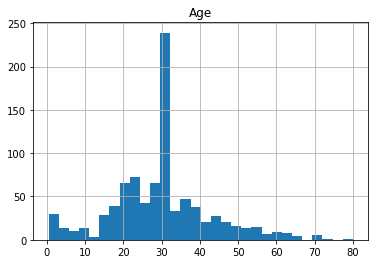

In [30]:
%pylab inline
age_histogram = df.hist('Age', bins = 30)

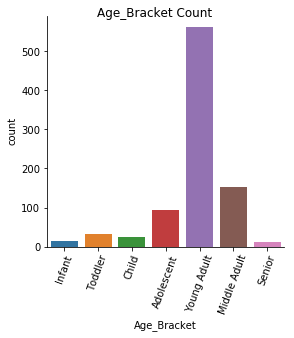

In [31]:
order = ['Infant', 'Toddler','Child','Adolescent','Young Adult','Middle Adult','Senior']
age_bracket_hist = sns.factorplot(x = "Age_Bracket", data=df, order = order, kind = 'count')
age_bracket_hist.set_xticklabels(rotation=70)
age_bracket_hist.fig.suptitle('Age_Bracket Count')

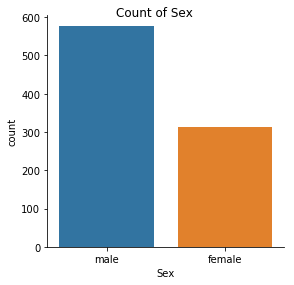

In [32]:
# Plotting the count of gender
sex_histogram = sns.factorplot('Sex', data = df, kind = 'count')
sex_histogram.fig.suptitle('Count of Sex')

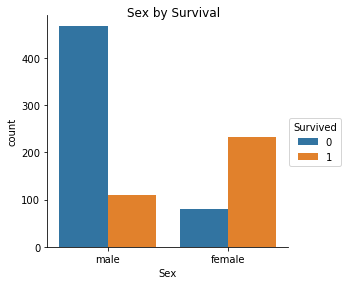

In [33]:
sex_by_survival = sns.factorplot(x = "Sex", data=df, hue = "Survived",  kind = 'count')
sex_by_survival.fig.suptitle('Sex by Survival')

In [38]:
def by_survival(variable):
    return df[[variable, 'Survived']].groupby(variable,as_index=False).mean().sort_values(by='Survived')

print by_survival('Sex')

      Sex  Survived
1    male  0.188908
0  female  0.742038


(0, 0.06)

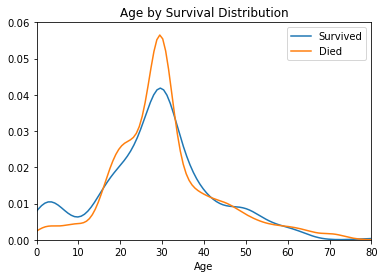

In [39]:
df[df['Survived'] == 1].Age
age_by_survival = sns.distplot(df[df['Survived'] == 1].Age,hist= False,label = "Survived")
age_by_survival = sns.distplot(df[df['Survived'] == 0].Age,hist = False, label = "Died")
age_by_survival.set_title('Age by Survival Distribution')
pylab.xlim([0,80])
pylab.ylim([0,.06])

<p>&#9642; The plots shown above displays the given passenger's age factored by sex and whether he or she survived. We can verify that although we have more males, males (particularly younger) have a <b>lower survival rate</b> compared to females. We see a a noticeable gap in infants survival rate as well. </p>

### 5b. Does social-economic status (SES) affect the survival rate?

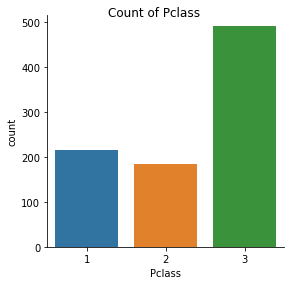

In [40]:
pclass_hist = sns.factorplot('Pclass', data = df, kind = 'count')
pclass_hist.fig.suptitle('Count of Pclass')

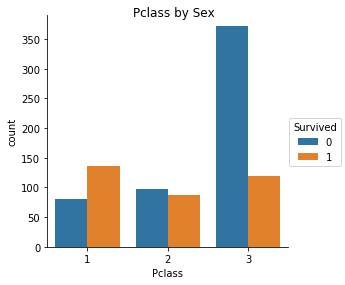

In [41]:
pclass_by_sex = sns.factorplot(x = "Pclass", data=df, hue = "Survived",  kind = 'count')
pclass_by_sex.fig.suptitle('Pclass by Sex')

In [42]:
# Calculating the percentage of Pclass to total given passengers.
count_values('Pclass')/float(len(df.index))

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [43]:
print by_survival('Pclass')

   Pclass  Survived
2       3  0.242363
1       2  0.472826
0       1  0.629630


<p>&#9642; Based on the information, first class passengers tend to have a higher survival rate. We can see that the socio-economic status of the passengers did play some role on the survival rate.</p>

### 5c. Does having family relations tend to have a higher survival rate?

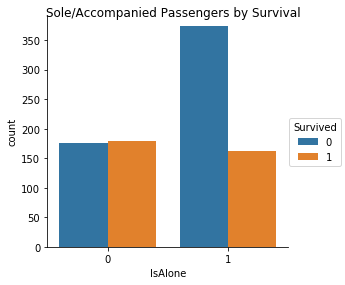

In [44]:
alone_by_survival = sns.factorplot(x = "IsAlone", data=df, hue = "Survived",  kind = 'count')
alone_by_survival.fig.suptitle('Sole/Accompanied Passengers by Survival')

In [45]:
print 'Count:','\n',count_values('IsAlone'),'\n','\n','Percentage:','\n',count_values('IsAlone')/float(len(df.index))

Count: 
1    537
0    354
Name: IsAlone, dtype: int64 

Percentage: 
1    0.602694
0    0.397306
Name: IsAlone, dtype: float64


In [46]:
print by_survival('IsAlone')

   IsAlone  Survived
1        1  0.303538
0        0  0.505650


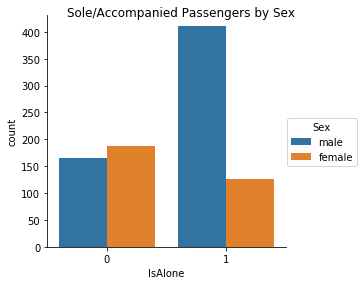

In [47]:
alone_by_sex = sns.factorplot(x = "IsAlone", data=df, hue = "Sex",  kind = 'count')
alone_by_sex.fig.suptitle('Sole/Accompanied Passengers by Sex')

In [48]:
df.groupby(['IsAlone','Sex', 'Survived'])['Survived'].count()

IsAlone  Sex     Survived
0        female  0            54
                 1           134
         male    0           121
                 1            45
1        female  0            27
                 1            99
         male    0           347
                 1            64
Name: Survived, dtype: int64

<p>&#9642; We can see that a given passenger with family relations has a higher survival rate. A sole male passenger tended to have the least likely survival rate.</p>

### 5d. Did port of embarkment have any impact on survival rate?

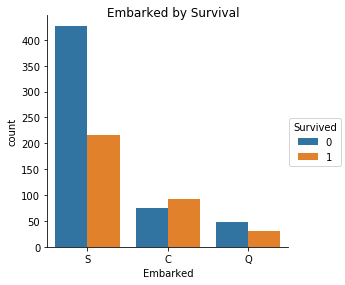

In [49]:
embarked_by_survival = sns.factorplot(x = "Embarked", data=df, hue = "Survived",  kind = 'count')
embarked_by_survival.fig.suptitle('Embarked by Survival')

In [50]:
print 'Count:'
print count_values('Embarked')/float(len(df.index)),'\n'
print by_survival('Embarked')

Count:
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64 

  Embarked  Survived
2        S  0.336957
1        Q  0.389610
0        C  0.553571


In [51]:
port_by_pclass = df.groupby(['Embarked','Pclass'])['Pclass'].count()

c = port_by_pclass[0:3]
print c/c.sum(),'\n'
q = port_by_pclass[3:6]
print q/q.sum(), '\n'
s = port_by_pclass[6:]
print s/s.sum()

Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Name: Pclass, dtype: float64 

Embarked  Pclass
Q         1         0.025974
          2         0.038961
          3         0.935065
Name: Pclass, dtype: float64 

Embarked  Pclass
S         1         0.197205
          2         0.254658
          3         0.548137
Name: Pclass, dtype: float64


<p>&#9642; It shows that although <b>more than 70%</b> of given passengers embarked from Southampton, the 18% of the given passengers from Cherbourg had a higher survival rate. For further investigation, I decided to group the data by 'Embarked' and 'Pclass'. It is shown that <b>almost half of the passengers</b> from Cherbourg were 1st class whereas majority of the passengers from Southampton and Queenstown were 3rd class.</p>

### 5e. Which variables have a strong correlation with one another?

In [52]:
# Convert 'Sex' to 0 for female, 1 for male...
df['Sex'] = df['Sex'].map({'female':0,'male':1}).astype(int)

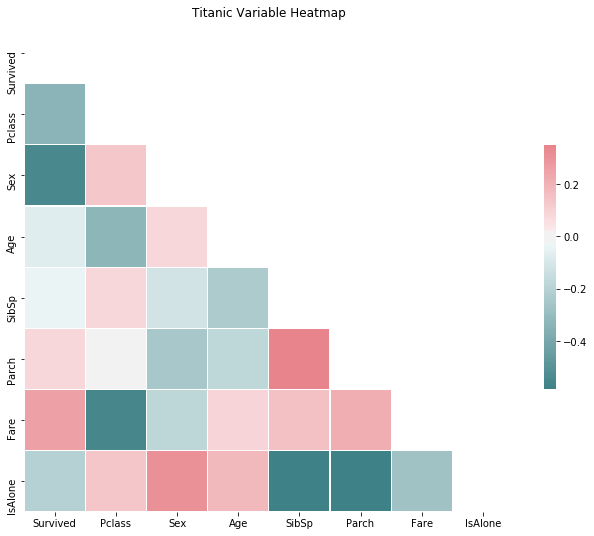

In [53]:
corr = df.drop('PassengerId', axis=1).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.35, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5}).set_title('Titanic Variable Heatmap')

plt.show()

<b>Observation:</b>
<br>
<p>&#9642; Females (Sex = 0) have a strong correlation with Survival=1.<br>
&#9642; Pclass = 1 tend to show increasing fare price.<br>
&#9642; Parch and SibSp have a strong correlation.<br>
&#9642; It would make sense to have a strong negative correlation between IsAlone and SibSp/Parch.<br>
&#9642; Male passengers are more likely to be alone.</p>

## 6. Conclusion

We were given ~40% of the total passengers that boarded the Titanic and ~38% of the passengers survived from the given data. Throughout this project, we were able to examine the overall structure, perform data wrangling, and use statistical analysis and visualizations to induce findings such as...
<br>
<p>&#9642; <b>Females and infants</b> tended to have a higher survival rate.<br>
&#9642; Passengers <b>with family relations</b> displayed a higher survival rate.<br>
&#9642; <b>1st class passengers</b> showed a higher survival rate<br>
&#9642; <b>Cherbourg</b> displayed a higher survival rate.<br>
<br>
In terms of limitations of the dataset, there were <b>only 22%</b> of the given passengers with information regarding cabin and majority of that information came from 1st class passengers. If more information were given, I would like to analyze and test whether the passengers survived based on their relative distance from the accessways to the boats.

## 7. Reference
https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition<br>
https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic<br>
https://www.ma.utexas.edu/users/mks/statmistakes/skeweddistributions.html<br>
https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-colum<br>
https://stackoverflow.com/questions/14162723/replacing-pandas-or-numpy-nan-with-a-none-to-use-with-mysqldb<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html
https://en.wikipedia.org/wiki/Child_development<br>
https://en.wikipedia.org/wiki/Young_adult_(psychology)<br>
https://stackoverflow.com/questions/21202652/getting-all-rows-with-nan-value<br>
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html<br>
http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.map.html<br>
https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas<br>
http://seaborn.pydata.org/examples/many_pairwise_correlations.html<br>
https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot<br>
https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot<br>